In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cmcrameri
import cmcrameri.cm as cmc
from scipy.stats import pearsonr
from PIL import Image
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv("/Users/tracysanchezpacheco/Downloads/df_for_plot3_withGroupAvg.csv")

In [3]:
data.head()

,Minimal Distance,condition,Par_ID,normalized_value
0,4.04,Individual,0,0.455477
1,3.47,Individual,1,0.095573
2,5.08,Individual,2,1.112144
3,1.14,Individual,3,-1.375614
4,4.80,Individual,4,0.935349


In [4]:
wide_df = data.pivot(index='Par_ID', columns='condition', values='Minimal Distance')

In [5]:
wide_df.reset_index(inplace=True)

In [6]:
wide_df.head()

condition,Par_ID,Avg. Group,Avg. Pair,Group,Individual,Pair
0,0,5.347974,4.028785,1.61,4.04,2.08
1,1,3.182586,1.944384,4.21,3.47,4.35
2,2,4.127180,3.277574,1.84,5.08,2.09
3,3,1.554655,2.852487,1.59,1.14,1.23
4,4,4.614139,2.681584,6.53,4.80,4.47


<Axes: xlabel='Avg. Pair', ylabel='Pair'>

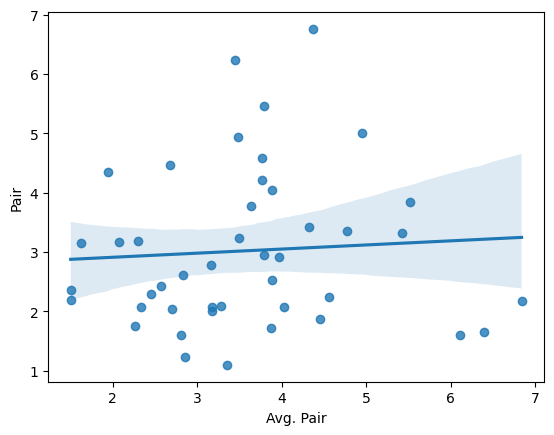

In [7]:
sns.regplot(data= wide_df, x= "Avg. Pair", y="Pair")

<Axes: xlabel='Avg. Group', ylabel='Group'>

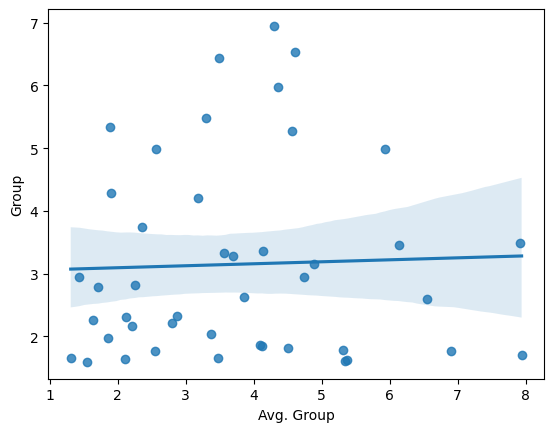

In [8]:
sns.regplot(data= wide_df, x= "Avg. Group", y="Group")

<Axes: xlabel='Pair', ylabel='Group'>

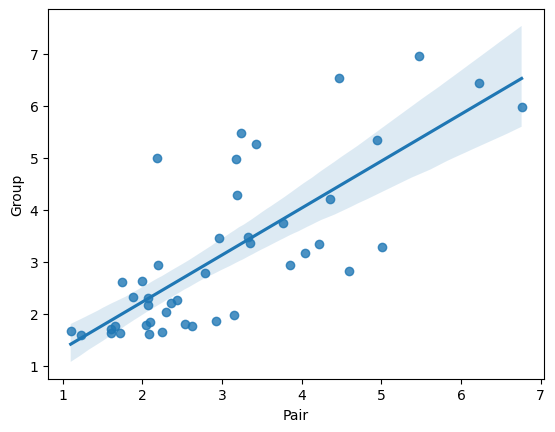

In [9]:
sns.regplot(data= wide_df, x= "Pair", y="Group")

In [10]:
from scipy.stats import mannwhitneyu, wilcoxon

list1 = wide_df["Avg. Pair"]
list2 = wide_df["Pair"]


# Removing NaN values from both lists
list1_clean = np.array(list1)
list2_clean = np.array(list2)

# Remove NaN values
list1_clean = list1_clean[np.isfinite(list1_clean)]
list2_clean = list2_clean[np.isfinite(list2_clean)]

# Mann-Whitney U Test (independent samples)
#stat, p = mannwhitneyu(list1, list2)

# Wilcoxon Signed-Rank Test (paired samples)
stat, p = wilcoxon(list1_clean, list2_clean)

print(f"Statistic: {stat}, p-value: {p}")


Statistic: 333.0, p-value: 0.058972117819735104


In [11]:
Statistic: nan, p-value: nan

SyntaxError: invalid syntax (3167551625.py, line 1)

In [ ]:
len(list1_clean)

In [ ]:
len(list2_clean)

In [ ]:
wide_df.columns

In [ ]:
# Calculate correlation matrices
corr_matrix = wide_df[['Avg. Group', 'Avg. Pair', 'Group', 'Individual', 'Pair']].corr(method='spearman')

In [ ]:
plt.matshow(corr_matrix, cmap='coolwarm')

In [ ]:
# Function to calculate significant correlations
def calculate_significant_correlations(df, alpha=0.05):
    """Calculate correlations and mask non-significant ones."""
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)

    for row in df.columns:
        for col in df.columns:
            if row != col:
                valid_data = df[[row, col]].dropna()
                if len(valid_data) > 1:  # Ensure enough data points for correlation
                    _, p_value = pearsonr(valid_data[row], valid_data[col])
                    p_matrix.at[row, col] = p_value
                else:
                    p_matrix.at[row, col] = np.nan  # Mark as NaN if insufficient data

    # Mask non-significant correlations
    mask = (p_matrix > alpha) | (p_matrix.isna())
    corr_matrix[mask] = np.nan
    return corr_matrix

In [ ]:
sns.heatmap(
    corr_matrix, 
    annot=True, 
    annot_kws={"size": 14},  # Larger annotations
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    #mask=corr_matrix_congruent.isnull(), 
    #ax=axes[1]
)

In [ ]:
labelsize = 40 # text
legendsize = 40 # ledgend
ticksize = 30 # ticks
numbersize = 60 # A, B etc.
fname = "Arial" # font name

plt.figure(figsize=(30, 35), constrained_layout=True)

palette ={"Individual": "red", "Pair": 'green', "Group": "blue"}
cmap=cmc.roma
#palette = cmap(np.linspace(0, 1, 20))

pal = cmap(np.linspace(0, 1, 20))
numbers = [0,6,-1]
palette = []
for idx in numbers:
    palette= palette + [pal[idx]]

palette = palette + palette[1:]
pal = cmap(np.linspace(0, 1, 30))
numbers = [20,14]
palette1 = []
for idx in numbers:
    palette1 = palette1+ [pal[idx]]    

ax0 = plt.subplot2grid(shape=(7, 6), loc=(0, 0), rowspan=4, colspan=6)
ax1 = plt.subplot2grid(shape=(7, 6), loc=(4, 0), rowspan=2, colspan=6)
ax2 = plt.subplot2grid(shape=(7, 6), loc=(6, 0), rowspan=1, colspan=6)



###### boxplot
sns.boxplot(data, x = "Minimal Distance", y = 'condition', ax=ax1, palette= palette)
ax1.set_xlim([0, 8])
ax1.set_xlabel("Distance (m)", size = labelsize, fontname=fname)
ax1.set_ylabel('     ', size = labelsize, fontname=fname)
for label in ax1.get_xticklabels(): # change tick font
    label.set_fontproperties(fname)
for label in ax1.get_yticklabels():
    label.set_fontproperties(fname)
ax1.yaxis.set_tick_params(labelsize=ticksize)  # change tick size
ax1.xaxis.set_tick_params(labelsize=ticksize)

###### boxplot average of groups
sns.boxplot(data,x = "Minimal Distance",y = 'condition', ax=ax2, palette= palette[1:],)
ax2.set_xlim([0, 8])
ax2.set_xlabel("Distance (m)", size = labelsize, fontname=fname)
ax2.set_ylabel('     ', size = labelsize, fontname=fname)
for label in ax2.get_xticklabels(): # change tick font
    label.set_fontproperties(fname)
for label in ax2.get_yticklabels():
    label.set_fontproperties(fname)
ax2.yaxis.set_tick_params(labelsize=ticksize)  # change tick size
ax2.xaxis.set_tick_params(labelsize=ticksize)


ax0.set_title("(a)", fontsize=numbersize, fontweight="bold",loc="left", x=-0.09, y=1.0, pad=-30, fontname=fname)
ax1.set_title("(b)", fontsize=numbersize, fontweight="bold",loc="left", x=-0.09, y=1.0, pad=-30, fontname=fname)
ax2.set_title("(c)", fontsize=numbersize, fontweight="bold",loc="left", x=-0.09, y=1.0, pad=-30, fontname=fname)

#plt.savefig("./fig4_distance_across_groups.png", bbox_inches="tight", pad_inches=0.3)
plt.show()

In [21]:
data = pd.read_csv("/Users/tracysanchezpacheco/Downloads/df_for_plot3_withGroupAvg.csv")
df = data
# Adding an "Avg." indicator column to the DataFrame
df['Avg_Indicator'] = df['condition'].str.contains('Avg').map({True: 'Avg', False: 'Regular'})

# Adding a new column to map Avg. Pair and Avg. Group conditions
def remap_condition(condition):
    if 'Avg. Pair' in condition:
        return 'Pair'
    elif 'Avg. Group' in condition:
        return 'Group'
    elif 'Pair' in condition:
        return 'Pair'
    elif 'Group' in condition:
        return 'Group'
    else:
        return 'Individual'

df['Remapped_Condition'] = df['condition'].apply(remap_condition)

In [ ]:
df.head()

In [ ]:
palette

In [ ]:
# Adjusting the order of conditions to ensure Avg. appears next to its respective group/pair

cmap=cmc.roma
#palette = cmap(np.linspace(0, 1, 20))

pal = cmap(np.linspace(0, 1, 20))
numbers = [0,6,-1]
palette = []
for idx in numbers:
    palette= palette + [pal[idx]]

palette = palette + palette[1:]
pal = cmap(np.linspace(0, 1, 30))
numbers = [20,14]
palette1 = []

for idx in numbers:
    palette1 = palette1+ [pal[idx]]  

# Creating a custom order for the conditions
custom_order = [
    'Individual', 
    'Pair', 
    'Group', 
]

# Plotting using seaborn's catplot with specified order and horizontal orientation
g = sns.catplot(
    data=df,
    dodge=True,
    y='Remapped_Condition',
    x='Minimal Distance',
    hue='Avg_Indicator',
    kind='box',
    height=6,
    aspect=2,
    palette=palette[1:],
    orient='h',
    order=custom_order
)

# Ensure each patch matches its respective condition
for patch, (_, row) in zip(path_patches, filtered_df.iterrows()):
    condition = row['Remapped_Condition']
    avg_indicator = row['Avg_Indicator']
    
    # Apply condition-based colors
    if condition in condition_palette:
        patch.set_facecolor(condition_palette[condition])
    
    # Apply transparency for Avg
    if avg_indicator == 'Avg':
        patch.set_alpha(0.3)


# Adjusting the plot
g.set_axis_labels("Minimal Distance", "Condition")
g.fig.suptitle("Horizontally Oriented Boxplot with Custom Order", y=1.02)
#plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot using Seaborn (hue for placement only)
g = sns.catplot(
    data=df,
    y='Remapped_Condition',
    x='Minimal Distance',
    hue='Avg_Indicator',  # Hue is used for grouping/placement
    kind='box',
    height=6,
    aspect=2,
    orient='h',
    order=['Individual', 'Pair', 'Avg. Pair', 'Group', 'Avg. Group'],  # Adjusted to desired order
    palette='pastel'  # Neutral palette for placement
)

# Manually override the colors using the Color column
for patch, (_, row) in zip(g.ax.patches, df.iterrows()):
    patch.set_facecolor(row['Color'][:3])  # Set the color from the Color column
    patch.set_alpha(row['Color'][3])      # Set transparency

# Final plot adjustments
g.set_axis_labels("Minimal Distance", "Condition")
g.fig.suptitle("Boxplot with Colors Directly from Data", y=1.02)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
 for patch  in g.ax.patches:
    print(patch)

In [ ]:
# Manually override the colors using the Color column
for patch, (_, row) in zip(g.ax.patches, df.iterrows()):
    print(row)

In [ ]:
# Define the desired order of conditions
desired_order = ['Individual', 'Pair', 'Avg. Pair', 'Group', 'Avg. Group']

# Assign colors based on the given logic
def assign_color(condition):
    if condition == 'Individual':
        return [0.492325, 0.090787, 0.000076, 1.0]  # Color for Individual
    elif condition in ['Pair', 'Avg. Pair']:
        return [0.76882, 0.668197, 0.291755, 1.0]   # Same color for Pair and Avg. Pair
    elif condition in ['Group', 'Avg. Group']:
        return [0.009824, 0.192129, 0.596704, 1.0]  # Same color for Group and Avg. Group

# Build the palette dictionary
palette = {condition: assign_color(condition)[:3] for condition in desired_order}

# Display the palette
print("Generated Palette:", palette)



In [ ]:
import matplotlib.pyplot as plt

# Define the desired order of conditions
desired_order = ['Individual', 'Pair', 'Avg. Pair', 'Group', 'Avg. Group']

# Assign colors based on the given logic
def assign_color(condition):
    if condition == 'Individual':
        return [0.492325, 0.090787, 0.000076, 1.0]  # Color for Individual
    elif condition in ['Pair', 'Avg. Pair']:
        return [0.76882, 0.668197, 0.291755, 1.0]   # Same color for Pair and Avg. Pair
    elif condition in ['Group', 'Avg. Group']:
        return [0.009824, 0.192129, 0.596704, 1.0]  # Same color for Group and Avg. Group

# Build the palette dictionary
palette = {condition: assign_color(condition)[:3] for condition in desired_order}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each condition in the desired order to create boxplots
for i, cond in enumerate(desired_order):
    data = df[df['condition'] == cond]['Minimal Distance']  # Data for the condition
    bp = ax.boxplot(
        data,
        positions=[i + 1],  # Use the index in desired order as the y-position
        patch_artist=True,
        vert=False,
        widths=0.6
    )
    # Apply colors from the palette
    for box in bp['boxes']:
        box.set_facecolor(palette.get(cond, "white"))  # Use the palette for coloring
        box.set_edgecolor("black")
        box.set_linewidth(1.2)

# Customize the plot
ax.set_yticks(range(1, len(desired_order) + 1))
ax.set_yticklabels(desired_order)
ax.set_xlabel('Minimal Distance')
ax.set_title('Horizontal Boxplots Using Custom Palette')
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
 df[(df['Remapped_Condition'] == 'Pair') & (df['Avg_Indicator'] == 'Regular')]['Minimal Distance'].values

In [ ]:
# Define the desired order of conditions
desired_order = ['Individual', 'Pair', 'Avg. Pair', 'Group', 'Avg. Group']

# Enforce the desired order
df['condition'] = pd.Categorical(df['condition'], categories=desired_order, ordered=True)
df = df.sort_values('condition') 

for i, cond in enumerate(desired_order):
    data = df[df['condition'] == cond]['Minimal Distance']  # Data for the condition
    if not data.empty:  # Ensure there's data for this condition
        bp = ax.boxplot(
            data,
            positions=[i + 1],  # Use the index in desired order as the y-position
            patch_artist=True,
            vert=False,
            widths=0.6
        )
        # Apply colors from the palette
        for box in bp['boxes']:
            box.set_facecolor(palette[cond])
            box.set_edgecolor("black")
            box.set_linewidth(1.2)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Define the desired order of conditions
desired_order = ['Individual', 'Pair', 'Avg. Pair', 'Group', 'Avg. Group']

# Enforce the desired order
df['condition'] = pd.Categorical(df['condition'], categories=desired_order, ordered=True)
df = df.sort_values('condition')  # Sort the DataFrame by the desired order

# Create a dictionary for colors
palette = {cond: color[:7] for cond, color in zip(desired_order, df.groupby('condition')['Color'].first())}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each condition in the desired order
for i, cond in enumerate(desired_order):
    data = df[df['condition'] == cond]['Minimal Distance']  # Data for the condition
    if not data.empty:  # Ensure there's data for this condition
        bp = ax.boxplot(
            data,
            #positions=[i + 1],  # Use the index in desired order as the y-position
            patch_artist=True,
            vert=False,
            widths=0.6
        )
        # Apply colors from the palette
        for box in bp['boxes']:
            box.set_facecolor(palette[cond])
            box.set_edgecolor("black")
            box.set_linewidth(1.2)

# Customize the plot
ax.set_yticks(range(1, len(desired_order) + 1))
ax.set_yticklabels(desired_order)
ax.set_xlabel('Minimal Distance')
ax.set_title('Horizontal Boxplots with Correct Order and Colors')
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


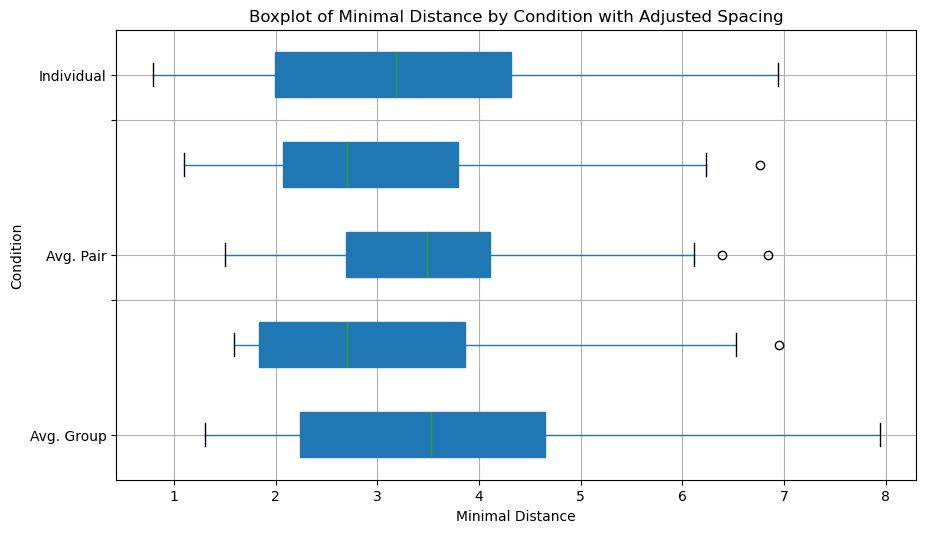

In [14]:
df = data

# Define the desired order
desired_order = ['Avg. Group', 'Group', 'Avg. Pair', 'Pair', 'Individual']

# Reorder the 'condition' column
df['condition'] = pd.Categorical(df['condition'], categories=desired_order, ordered=True)

# Create the boxplot with adjusted spacing
fig, ax = plt.subplots(figsize=(10, 6))

# Grouping by condition and plotting boxplot
df.boxplot(column='Minimal Distance', by='condition', ax=ax, vert=False, patch_artist=True)

# Adjust the spacing of the y-axis ticks
positions = [5, 4.5, 3, 2.5, 1]  # Custom positions: Half distance for Avg conditions
ax.set_yticks(positions)
#ax.set_yticklabels(desired_order)

# Customize the plot
ax.set_title('Boxplot of Minimal Distance by Condition with Adjusted Spacing')
ax.set_xlabel('Minimal Distance')
ax.set_ylabel('Condition')
plt.suptitle("")  # Remove the automatic title generated by pandas boxplot

# Show the plot
plt.show()


In [49]:
cmap=cmc.roma
#palette = cmap(np.linspace(0, 1, 20))

pal = cmap(np.linspace(0, 1, 20))
numbers = [0,6,-1]
palette = []
for idx in numbers:
    palette= palette + [pal[idx]]

palette = palette + palette[1:]
pal = cmap(np.linspace(0, 1, 30))
numbers = [20,14]
palette1 = []
for idx in numbers:
    palette1 = palette1+ [pal[idx]] 
    
palette


[array([4.92325e-01, 9.07870e-02, 7.60000e-05, 1.00000e+00]),
 array([0.76882 , 0.668197, 0.291755, 1.      ]),
 array([0.009824, 0.192129, 0.596704, 1.      ]),
 array([0.76882 , 0.668197, 0.291755, 1.      ]),
 array([0.009824, 0.192129, 0.596704, 1.      ])]

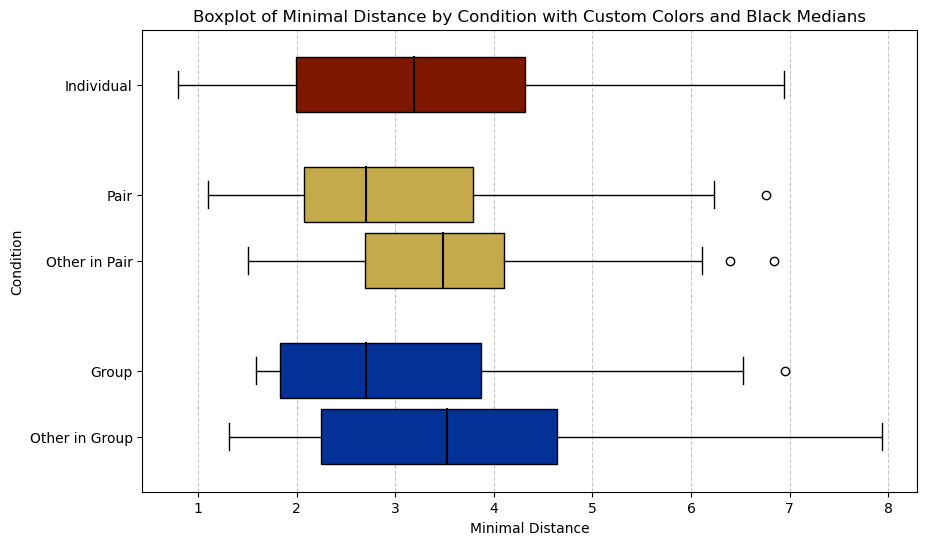

In [51]:
data = pd.read_csv("/Users/tracysanchezpacheco/Downloads/df_for_plot3_withGroupAvg.csv")
df = data

# Reformatting the values in the 'condition' column
df['condition'] = df['condition'].replace({'Avg. Pair': 'Other in Pair', 'Avg. Group': 'Other in Group'})

# Display the updated DataFrame
df.head()


# Define the desired order
desired_order = ['Individual', 'Pair', 'Other in Pair','Group','Other in Group']



# Define the required colors
colors = [
    [0.492325, 0.090787, 0.000076, 1.0],  # Red for Individual
    [0.76882, 0.668197, 0.291755, 1.0],   # Yellow for Pairs
    [0.009824, 0.192129, 0.596704, 1.0],  # Blue for Groups
    [0.76882, 0.668197, 0.291755, 1.0],   # Yellow for Other in Pair
    [0.009824, 0.192129, 0.596704, 1.0],  # Blue for Other in Group
]

# Map colors to conditions
palette = {
    'Individual': colors[0][:3],         # Red
    'Pair': colors[1][:3],               # Yellow
    'Other in Pair': colors[3][:3],      # Yellow
    'Group': colors[2][:3],              # Blue
    'Other in Group': colors[4][:3],     # Blue
}

# Create the boxplot with adjusted spacing and black medians
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each condition with custom spacing and colors
for pos, cond in zip(positions, desired_order):
    data = df[df['condition'] == cond]['Minimal Distance'].dropna()

    bp = ax.boxplot(
        data,
        positions=[pos],  # Custom y-position
        patch_artist=True,
        vert=False,
        widths=0.5,
        medianprops={'color': 'black', 'linewidth': 1.5}  # Set median line properties
    )

    # Set custom color for the box
    for box in bp['boxes']:
        box.set_facecolor(palette[cond])
        box.set_edgecolor("black")

# Customize the plot
ax.set_yticks(positions)
ax.set_yticklabels(desired_order)
ax.set_title('Boxplot of Minimal Distance by Condition with Custom Colors and Black Medians')
ax.set_xlabel('Minimal Distance')
ax.set_ylabel('Condition')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [18]:
# Plot each condition with custom spacing
for pos, cond in zip(positions, desired_order):
    print(df[df['condition'] == cond])

    Minimal Distance   condition  Par_ID  normalized_value
0               4.04  Individual       0          0.455477
1               3.47  Individual       1          0.095573
2               5.08  Individual       2          1.112144
3               1.14  Individual       3         -1.375614
4               4.80  Individual       4          0.935349
5               1.72  Individual       5         -1.009396
6               5.35  Individual       6          1.282625
7               3.92  Individual       7          0.379707
8               1.49  Individual       8         -1.154621
9               3.35  Individual       9          0.019803
10              0.79  Individual      10         -1.596608
11              1.64  Individual      11         -1.059909
12              3.11  Individual      12         -0.131735
13              1.26  Individual      13         -1.299845
14              5.74  Individual      14          1.528875
15              4.14  Individual      15          0.5186

In [ ]:
# Plot each condition with custom spacing

data = df[df['condition'] == 'Individual']['Minimal Distance'
ax.boxplot(
    data,
    positions=0,  # Custom y-position
    patch_artist=True,
    vert=False,
    widths=0.6
)
data = df[df['condition'] == 'Pairs']['Minimal Distance']
ax.boxplot(
    data,
    positions=1,  # Custom y-position
    patch_artist=True,
    vert=False,
    widths=0.6
)
data = df[df['condition'] == 'Avg. Pairs']['Minimal Distance']
ax.boxplot(
    data,
    positions=1.5,  # Custom y-position
    patch_artist=True,
    vert=False,
    widths=0.6
)
plt.show()

In [ ]:
for pos, cond in zip(positions, desired_order):
    print(df['condition'] == cond)

In [ ]:
df.condition.value_counts()

In [ ]:
import matplotlib.pyplot as plt

# Define the desired order of conditions
desired_order = ['Individual', 'Pair', 'Avg. Pair', 'Group', 'Avg. Group']

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each condition in the desired order
for i, cond in enumerate(desired_order):
    data = df[df['condition'] == cond]['Minimal Distance']  # Data for the condition
    bp = ax.boxplot(
        data,
        positions=[i + 1],  # Use the index in desired order as the y-position
        patch_artist=True,
        vert=False,
        widths=0.6
    )
    # Apply custom colors
    for box in bp['boxes']:
        box.set_facecolor(colors.get(cond, "white"))  # Default to white if no color is found
        box.set_edgecolor("black")
        box.set_linewidth(1.2)

# Customize the plot
ax.set_yticks(range(1, len(desired_order) + 1))
ax.set_yticklabels(desired_order)
ax.set_xlabel('Minimal Distance')
ax.set_title('Horizontal Boxplots Ordered by Desired Sequence')
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



In [ ]:
# Ensure each patch matches its respective condition
for patch, (_, row) in zip(path_patches, df.iterrows()):
    condition = row['Remapped_Condition']
    avg_indicator = row['Avg_Indicator']
    
    # Apply condition-based colors
    if condition in condition_palette:
        print(condition_palette[condition])

In [ ]:
# Filter for PathPatch objects in the plot
path_patches = [patch for patch in g.ax.patches if isinstance(patch, PathPatch)]

# Match the filtered DataFrame to the order of patches
# This assumes that the boxplot's internal grouping matches the order of your custom_order
filtered_df = df[df['Remapped_Condition'].isin(custom_order)].reset_index()

# Ensure each patch matches its respective condition
for patch, (_, row) in zip(path_patches, filtered_df.iterrows()):
    condition = row['Remapped_Condition']
    avg_indicator = row['Avg_Indicator']
    
    # Apply condition-based colors
    if condition in condition_palette:
        patch.set_facecolor(condition_palette[condition])
    
    # Apply transparency for Avg
    if avg_indicator == 'Avg':
        patch.set_alpha(0.3)

# Final plot adjustments
g.set_axis_labels("Minimal Distance", "Condition")
g.fig.suptitle("Fully Customized Boxplot with Correct Patch Matching", y=1.02)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
